### Contents
1. Accepted Paper List with arXiv Link
2. Keywords
3. Word Cloud
4. Output (README)

In [1]:
import json
from typing import Dict, List, Tuple

CONFERENCE = "ACL 2021"
CONFERENCE_LINK = "https://2021.aclweb.org"

# 1. Accepted Paper List with arXiv Link

## Read Paper List

In [2]:
def load_papers(path: str) -> List[Tuple[str, str]]:
    with open(path) as f:
        papers = [paper_str.strip().split("\n") for paper_str in f.read().split("\n\n")]
    # check
    for paper in papers:
        assert len(paper) == 2, f"Wrong format! {paper}"
    return papers

In [3]:
def load_track(path: str) -> Dict[str, str]:
    with open(path) as f:
        track = json.load(f)
    return track

In [4]:
main_long = load_papers("data/main_long.txt")
main_short = load_papers("data/main_short.txt")
findings_long = load_papers("data/findings_long.txt")
findings_short = load_papers("data/findings_short.txt")

track_papers = load_track("data/track.json")
papers_track = {p: k for k, v in track_papers.items() for p in v}

In [5]:
print("[Main Conference]")
print("# of Long papers:", len(main_long))
print("# of Short papers:", len(main_short))
print("[Findings]")
print("# of Long papers:", len(findings_long))
print("# of Short papers:", len(findings_short))
print("Total:", len(main_long) + len(main_short) + len(findings_long) + len(findings_short))

[Main Conference]
# of Long papers: 571
# of Short papers: 139
[Findings]
# of Long papers: 340
# of Short papers: 118
Total: 1168


In [6]:
main_long[:3]

[['Semi-Supervised Text Classification with Balanced Deep Representation Distributions',
  'Changchun Li, Ximing Li and Jihong Ouyang'],
 ['Generalising Multilingual Concept-to-Text NLG with Language Agnostic Delexicalisation',
  'Giulio Zhou and Gerasimos Lampouras'],
 ['How Good is Your Tokenizer? On the Monolingual Performance of Multilingual Language Models',
  'Phillip Rust, Jonas Pfeiffer, Ivan Vulić, Sebastian Ruder and Iryna Gurevych']]

In [7]:
list(track_papers.keys())

['Computational Social Science and Cultural Analytics',
 'Language Generation',
 'Dialog and Interactive Systems',
 'Information Extraction',
 'Machine Translation and Multilinguality',
 'Sentiment Analysis, Stylistic Analysis, and Argument Mining',
 'Summarization',
 'Interpretability and Analysis of Models for NLP',
 'Language Grounding to Vision, Robotics and Beyond',
 'Machine Learning for NLP',
 'Semantics: Sentence-level Semantics, Textual Inference and Other areas',
 'Linguistic Theories, Cognitive Modeling and Psycholinguistics',
 'Semantics: Lexical Semantics',
 'Phonology, Morphology and Word Segmentation',
 'Speech and Multimodality',
 'Ethics in NLP',
 'Information Retrieval and Text Mining',
 'Resources and Evaluation',
 'Syntax: Tagging, Chunking, and Parsing',
 'Theme',
 'NLP Applications',
 'Question Answering',
 'Discourse and Pragmatics']

In [8]:
for paper in main_long:
    paper.append(papers_track[paper[0]])

for paper in main_short:
    paper.append(papers_track[paper[0]])
    
for paper in findings_long:
    paper.append("")

for paper in findings_short:
    paper.append("")

In [9]:
main_long[:3]

[['Semi-Supervised Text Classification with Balanced Deep Representation Distributions',
  'Changchun Li, Ximing Li and Jihong Ouyang',
  'Information Retrieval and Text Mining'],
 ['Generalising Multilingual Concept-to-Text NLG with Language Agnostic Delexicalisation',
  'Giulio Zhou and Gerasimos Lampouras',
  'Language Generation'],
 ['How Good is Your Tokenizer? On the Monolingual Performance of Multilingual Language Models',
  'Phillip Rust, Jonas Pfeiffer, Ivan Vulić, Sebastian Ruder and Iryna Gurevych',
  'Machine Translation and Multilinguality']]

## Search arXiv Link

In [10]:
from googlesearch import search
import urllib
from bs4 import BeautifulSoup
from difflib import SequenceMatcher
from tqdm import tqdm
import time


def similarity(a, b):
    return SequenceMatcher(None, a, b).ratio()


def search_arxiv_link(title):
    link = None
    for j in search(title, tld="co.in", num=10, stop=1, pause=1.0, user_agent=CONFERENCE):
        if 'arxiv.org/abs' in j:
            thepage = urllib.request.urlopen(j)
            soup = BeautifulSoup(thepage, "html.parser")
            searched_title = ' '.join(soup.title.text.lower().split()[1:])
            if similarity(title, searched_title) > 0.8:
                link = j
                break
            else:
                print(f"NOT MATCHED: {title} -- {searched_title}")
    return link

## Generate Paper List (Markdown Text) with arXiv Link

In [11]:
def attach_arxiv_link(papers):
    for p in tqdm(papers):
        title, authors, track = p
        link = search_arxiv_link(title.lower())
        if link:
            p.append(link)
        else:
            p.append("")

In [12]:
attach_arxiv_link(main_long)
print(main_long[0])

  5%|▍         | 26/571 [01:23<28:07,  3.10s/it]

NOT MATCHED: photochat: a human-human dialogue dataset with photo sharing behavior for joint image-text modeling -- image chat: engaging grounded conversations


  5%|▌         | 31/571 [01:39<29:19,  3.26s/it]

NOT MATCHED: competence-based multimodal curriculum learning for medical report generation -- competence-based curriculum learning for neural machine translation


  6%|▋         | 36/571 [01:56<29:33,  3.32s/it]

NOT MATCHED: protaugment: intent detection meta-learning through unsupervised diverse paraphrasing -- protaugment: unsupervised diverse short-texts paraphrasing for intent detection meta-learning


 19%|█▉        | 109/571 [05:47<26:06,  3.39s/it]

NOT MATCHED: repsum: unsupervised dialogue summarization based on replacement strategy -- unsupervised abstractive dialogue summarization for tete-a-tetes


 21%|██        | 120/571 [06:19<22:35,  3.01s/it]

NOT MATCHED: a knowledge-guided framework for frame identification -- learnda: learnable knowledge-guided data augmentation for event causality identification


 21%|██        | 121/571 [06:23<23:08,  3.09s/it]

NOT MATCHED: a bidirectional transformer based alignment model for unsupervised word alignment -- slua: a super lightweight unsupervised word alignment model via cross-lingual contrastive learning


 23%|██▎       | 131/571 [06:53<22:21,  3.05s/it]

NOT MATCHED: breaking the corpus bottleneck for context-aware neural machine translation with cross-task pre-training -- diving deep into context-aware neural machine translation


 27%|██▋       | 157/571 [08:13<22:41,  3.29s/it]

NOT MATCHED: dual slot selector via local reliability verification for dialogue state tracking -- find or classify? dual strategy for slot-value predictions on multi-domain dialog state tracking


 31%|███       | 176/571 [09:14<20:27,  3.11s/it]

NOT MATCHED: banditmtl: bandit-based multi-task learning for text classification -- multi-task learning for contextual bandits


 39%|███▉      | 225/571 [11:48<19:22,  3.36s/it]

NOT MATCHED: multi-stage pre-training over simplified multimodal pre-training models -- multi-stage pre-training for low-resource domain adaptation


 40%|███▉      | 228/571 [11:58<19:03,  3.33s/it]

NOT MATCHED: xmoco: cross momentum contrastive learning for open-domain question answering -- unitedqa: a hybrid approach for open domain question answering


 40%|████      | 231/571 [12:08<19:01,  3.36s/it]

NOT MATCHED: ctfn: hierarchical learning for multimodal sentiment analysis using coupled-translation fusion network -- multimodal sentiment analysis using hierarchical fusion with context modeling


 51%|█████     | 290/571 [15:14<15:13,  3.25s/it]

NOT MATCHED: de-confounded variational encoder-decoder for logical table-to-text generation -- variational template machine for data-to-text generation


 51%|█████▏    | 294/571 [15:26<14:22,  3.11s/it]

NOT MATCHED: xlpt-amr: cross-lingual pre-training via multi-task learning for zero-shot amr parsing and text generation -- zero-shot cross-lingual semantic parsing


 53%|█████▎    | 301/571 [15:48<14:40,  3.26s/it]

NOT MATCHED: rethinking stealthiness of backdoor attack against nlp models -- badnl: backdoor attacks against nlp models


 55%|█████▍    | 313/571 [16:28<13:03,  3.04s/it]

NOT MATCHED: a neural transition-based model for argumentation mining -- end-to-end semantic role labeling with neural transition-based model


 63%|██████▎   | 359/571 [18:47<11:39,  3.30s/it]

NOT MATCHED: poisoning knowledge graph embeddings via relation inference patterns -- data poisoning attack against knowledge graph embedding


 66%|██████▌   | 377/571 [19:41<10:06,  3.13s/it]

NOT MATCHED: taming pre-trained language models with n-gram representations for low-resource domain adaptation -- feature adaptation of pre-trained language models across languages and domains with robust self-training


 71%|███████   | 403/571 [21:03<09:31,  3.40s/it]

NOT MATCHED: supporting land reuse of former open pit mining sites using text classification and active learning -- mining legacy issues in open pit mining sites: innovation & support of renaturalization and land utilization


 73%|███████▎  | 418/571 [21:53<08:10,  3.21s/it]

NOT MATCHED: lexfit: lexical fine-tuning of pretrained language models -- fine-tuning pre-trained language model with weak supervision: a contrastive-regularized self-training approach


 74%|███████▍  | 424/571 [22:12<07:43,  3.15s/it]

NOT MATCHED: edited media understanding frames: reasoning about the intent and implications of visual misinformation -- edited media understanding: reasoning about implications of manipulated images


 75%|███████▍  | 427/571 [22:23<08:13,  3.42s/it]

NOT MATCHED: continuous language generative flow -- discrete flows: invertible generative models of discrete data


 77%|███████▋  | 438/571 [22:55<06:57,  3.14s/it]

NOT MATCHED: measure and evaluation of semantic divergence across two languages -- a computational approach to measuring the semantic divergence of cognates


 82%|████████▏ | 467/571 [24:23<05:41,  3.29s/it]

NOT MATCHED: learning latent structures for cross action phrase relations in wet lab protocols -- wnut-2020 task 1 overview: extracting entities and relations from wet lab protocols


 84%|████████▎ | 477/571 [24:53<04:48,  3.07s/it]

NOT MATCHED: learning to explain: generating stable explanations fast -- robust and stable black box explanations


 91%|█████████▏| 522/571 [27:17<02:56,  3.60s/it]

NOT MATCHED: modeling transitions of focal entities for conversational knowledge base question answering -- multi-task learning for conversational question answering over a large-scale knowledge base


 98%|█████████▊| 562/571 [29:19<00:29,  3.24s/it]

NOT MATCHED: bertac: enhancing transformer-based language models with adversarially pretrained convolutional neural networks -- adversarial training for large neural language models


100%|██████████| 571/571 [29:47<00:00,  3.13s/it]

['Semi-Supervised Text Classification with Balanced Deep Representation Distributions', 'Changchun Li, Ximing Li and Jihong Ouyang', 'Information Retrieval and Text Mining', '']


In [13]:
attach_arxiv_link(main_short)
print(main_short[0])

  8%|▊         | 11/139 [00:34<06:46,  3.18s/it]

NOT MATCHED: towards a more robust evaluation for conversational question answering -- towards data distillation for end-to-end spoken conversational question answering


 10%|█         | 14/139 [00:43<06:40,  3.20s/it]

NOT MATCHED: enhancing entity boundary detection for better chinese named entity recognition -- integrating boundary assembling into a dnn framework for named entity recognition in chinese social media text


 21%|██        | 29/139 [01:29<06:02,  3.30s/it]

NOT MATCHED: improving arabic diacritization with regularized decoding and adversarial training -- deep diacritization: efficient hierarchical recurrence for improved arabic diacritization


 27%|██▋       | 38/139 [01:57<05:28,  3.25s/it]

NOT MATCHED: towards visual question answering on pathology images -- pathological visual question answering


 50%|████▉     | 69/139 [03:36<03:42,  3.18s/it]

NOT MATCHED: towards generative aspect-based sentiment analysis -- a unified generative framework for aspect-based sentiment analysis


 94%|█████████▎| 130/139 [06:47<00:30,  3.34s/it]

NOT MATCHED: addressing semantic drift in generative question answering with auxiliary extraction -- addressing semantic drift in question generation for semi-supervised question answering


 96%|█████████▌| 133/139 [06:56<00:18,  3.15s/it]

NOT MATCHED: issues with entailment-based zero-shot text classification -- benchmarking zero-shot text classification: datasets, evaluation and entailment approach


 97%|█████████▋| 135/139 [07:01<00:12,  3.03s/it]

NOT MATCHED: a span-based dynamic local attention model for sequential sentence classification -- convbert: improving bert with span-based dynamic convolution


 99%|█████████▉| 138/139 [07:11<00:03,  3.20s/it]

NOT MATCHED: in factuality: efficient integration of relevant facts for visual question answering -- fvqa: fact-based visual question answering


100%|██████████| 139/139 [07:15<00:00,  3.13s/it]

['The Curse of Dense Low-Dimensional Information Retrieval for Large Index Sizes', 'Nils Reimers and Iryna Gurevych', 'Information Retrieval and Text Mining', 'https://arxiv.org/abs/2012.14210']


In [14]:
attach_arxiv_link(findings_long)
print(findings_long[0])

  5%|▍         | 16/340 [00:49<16:58,  3.14s/it]

NOT MATCHED: gog: relation-aware graph-over-graph network for visual dialog -- relation-aware graph attention network for visual question answering


 12%|█▏        | 42/340 [02:11<16:16,  3.28s/it]

NOT MATCHED: dialogue in the wild: learning from a deployed role-playing game with humans and bots -- learning from dialogue after deployment: feed yourself, chatbot!


 15%|█▍        | 50/340 [02:38<16:25,  3.40s/it]

NOT MATCHED: transsum: translating aspect and sentiment embeddings for self-supervised opinion summarization -- summarizing opinions: aspect extraction meets sentiment prediction and they are both weakly supervised


 22%|██▏       | 75/340 [04:00<14:08,  3.20s/it]

NOT MATCHED: do explanations help users detect errors in open-domain qa? an evaluation of spoken vs. visual explanations -- human evaluation of spoken vs. visual explanations for open-domain qa


 24%|██▎       | 80/340 [04:17<14:40,  3.39s/it]

NOT MATCHED: awakening latent grounding from pretrained language models for semantic parsing -- video-grounded dialogues with pretrained generation language models


 25%|██▍       | 84/340 [04:28<12:33,  2.94s/it]

NOT MATCHED: unsupervised knowledge selection for dialogue generation -- knowledge-grounded dialogue generation with pre-trained language models


 28%|██▊       | 95/340 [05:00<11:14,  2.75s/it]

NOT MATCHED: lichee: improving language model pre-training with multi-grained tokenization -- ambert: a pre-trained language model with multi-grained tokenization


 38%|███▊      | 129/340 [06:40<10:41,  3.04s/it]

NOT MATCHED: high-quality dialogue diversification by intermittent short extension ensembles -- high-quality diversification for task-oriented dialogue systems


 39%|███▊      | 131/340 [06:46<10:59,  3.16s/it]

NOT MATCHED: end-to-end construction of nlp knowledge graph -- end-to-end nlp knowledge graph construction


 42%|████▏     | 143/340 [07:21<10:12,  3.11s/it]

NOT MATCHED: entheos: a multimodal dataset for studying enthusiasm -- mutla: a large-scale dataset for multimodal teaching and learning analytics


 49%|████▊     | 165/340 [08:25<08:23,  2.88s/it]

NOT MATCHED: wind: weighting instances differentially for model-agnostic domain adaptation -- domain generalization via model-agnostic learning of semantic features


 56%|█████▌    | 190/340 [09:40<07:19,  2.93s/it]

NOT MATCHED: two parents, one child: dual transfer for low-resource neural machine translation -- a universal parent model for low-resource neural machine translation transfer


 58%|█████▊    | 197/340 [09:58<07:19,  3.07s/it]

NOT MATCHED: hacred: a large-scale relation extraction dataset toward hard cases in practical applications -- docred: a large-scale document-level relation extraction dataset


 59%|█████▊    | 199/340 [10:04<07:03,  3.00s/it]

NOT MATCHED: energy-based unknown intent detection with data manipulation -- deep unknown intent detection with margin loss


 61%|██████    | 208/340 [10:32<07:11,  3.27s/it]

NOT MATCHED: knowledge-grounded dialogue generation with term-level de-noising -- knowledge-grounded dialogue generation with pre-trained language models


 70%|███████   | 239/340 [12:09<05:35,  3.33s/it]

NOT MATCHED: multilingual translation from denoising pre-training -- multilingual denoising pre-training for neural machine translation


 76%|███████▌  | 258/340 [13:09<04:26,  3.25s/it]

NOT MATCHED: a non-autoregressive edit-based approach to controllable text simplification -- text simplification by tagging


 80%|████████  | 272/340 [13:52<03:40,  3.24s/it]

NOT MATCHED: cluster-former: clustering-based sparse transformer for question answering -- cluster-former: clustering-based sparse transformer for long-range dependency encoding


 89%|████████▉ | 302/340 [15:22<02:00,  3.17s/it]

NOT MATCHED: an investigation of suitability of pre-trained language models for dialogue generation – avoiding discrepancies -- an empirical investigation of pre-trained transformer language models for open-domain dialogue generation


 94%|█████████▍| 321/340 [16:19<00:59,  3.13s/it]

NOT MATCHED: named entity recognition via noise aware training mechanism with data filter -- nat: noise-aware training for robust neural sequence labeling


 96%|█████████▌| 327/340 [16:36<00:40,  3.10s/it]

NOT MATCHED: enhancing the open-domain dialogue evaluation in latent space -- generating dialogue responses from a semantic latent space


 97%|█████████▋| 331/340 [16:50<00:30,  3.41s/it]

NOT MATCHED: slot transferability for cross-domain slot filling -- robust zero-shot cross-domain slot filling with example values


100%|██████████| 340/340 [17:15<00:00,  3.05s/it]

['Explainable Inference Over Grounding-Abstract Chains for Science Questions', 'Mokanarangan Thayaparan, Marco Valentino and Andre Freitas', '', '']


In [15]:
attach_arxiv_link(findings_short)
print(findings_short[0])

  4%|▍         | 5/118 [00:17<06:31,  3.46s/it]

NOT MATCHED: better chinese sentence segmentation with reinforcement learning -- is word segmentation necessary for deep learning of chinese representations?


 16%|█▌        | 19/118 [00:58<04:47,  2.90s/it]

NOT MATCHED: frustratingly simple few-shot slot tagging -- few-shot learning for slot tagging with attentive relational network


 33%|███▎      | 39/118 [01:57<03:48,  2.89s/it]

NOT MATCHED: fusion: towards automated icd coding via feature compression -- towards automated icd coding using deep learning


 50%|█████     | 59/118 [02:57<03:20,  3.40s/it]

NOT MATCHED: enhancing zero-shot and few-shot stance detection with commonsense knowledge graph -- zero-shot learning with common sense knowledge graphs


 74%|███████▎  | 87/118 [04:23<01:30,  2.93s/it]

NOT MATCHED: modulating language models with emotions -- language models as emotional classifiers for textual conversations


 75%|███████▌  | 89/118 [04:29<01:25,  2.96s/it]

NOT MATCHED: analysis of tree-structured architectures for code generation -- treegen: a tree-based transformer architecture for code generation


 86%|████████▋ | 102/118 [05:08<00:54,  3.38s/it]

NOT MATCHED: biogen: generating biography summary under table guidance on wikipedia -- biogen: automated biography generation


 92%|█████████▏| 108/118 [05:25<00:29,  2.96s/it]

NOT MATCHED: batchmixup: improving training by interpolating hidden states of the entire mini-batch -- revisiting small batch training for deep neural networks


 94%|█████████▍| 111/118 [05:35<00:22,  3.24s/it]

NOT MATCHED: uncertainty aware review hallucination for science article classification -- uncertainty-aware organ classification for surgical data science applications in laparoscopy


100%|██████████| 118/118 [05:54<00:00,  3.00s/it]

['Diagnosing Transformers in Task-Oriented Semantic Parsing', 'Shrey Desai and Ahmed Aly', '', 'https://arxiv.org/abs/2105.13496']


# 2. Keywords

In [16]:
papers = main_long + main_short + findings_long + findings_short

In [17]:
len(papers)

1168

In [18]:
titles = [p[0] for p in papers]

In [19]:
titles[:3]

['Semi-Supervised Text Classification with Balanced Deep Representation Distributions',
 'Generalising Multilingual Concept-to-Text NLG with Language Agnostic Delexicalisation',
 'How Good is Your Tokenizer? On the Monolingual Performance of Multilingual Language Models']

In [20]:
from collections import Counter
import re

counter = Counter()
for title in titles:
    title = (
        title.lower()
        .replace(" multi-ling", " multiling")
        .replace(" multi-modal", " multimodal")
        .replace(" cross-ling", " cross-ling")
        .replace(" cross-modal", " crossmodal")
        .replace(" representation ", " representations ")
        .replace(" model ", " models ")
        .replace(" machine ", " machine-")
        .replace(" classification", "-classification")
        .replace(" extraction", "-extraction")
        .replace(" detection", "-detection")
        .replace(" recognition", "-recognition")
        .replace(" question ", " question-")
        .replace(" open domain ", " open-domain ")
        .replace(" language model", " langauge-model")
        .replace(" named ", " named-")
        .replace("pretrain", "pre-train")
    )
    splitted = title.split()
    counter.update(splitted)

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_deep_learning = [
    "",
    "deep",
    "learning",
    "neural",
    "network",
    "networks",
    "via",
    "using",
    "based",
    "towards",
    "text",
    "natural",
    "language",
    "model",
    "models",
    "approach",
    "improving",
]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joohong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
keywords = []
for w in counter.most_common():
    if w[0] not in stopwords.words('english') and w[0] not in stopwords_deep_learning:
        keywords.append(w)

In [23]:
keywords[:20]

[('generation', 86),
 ('knowledge', 66),
 ('langauge-models', 64),
 ('machine-translation', 61),
 ('graph', 56),
 ('representations', 54),
 ('data', 47),
 ('dialogue', 45),
 ('pre-trained', 45),
 ('question-answering', 41),
 ('summarization', 40),
 ('reasoning', 39),
 ('pre-training', 39),
 ('word', 38),
 ('dataset', 37),
 ('semantic', 35),
 ('evaluation', 34),
 ('understanding', 34),
 ('attention', 32),
 ('multilingual', 31)]

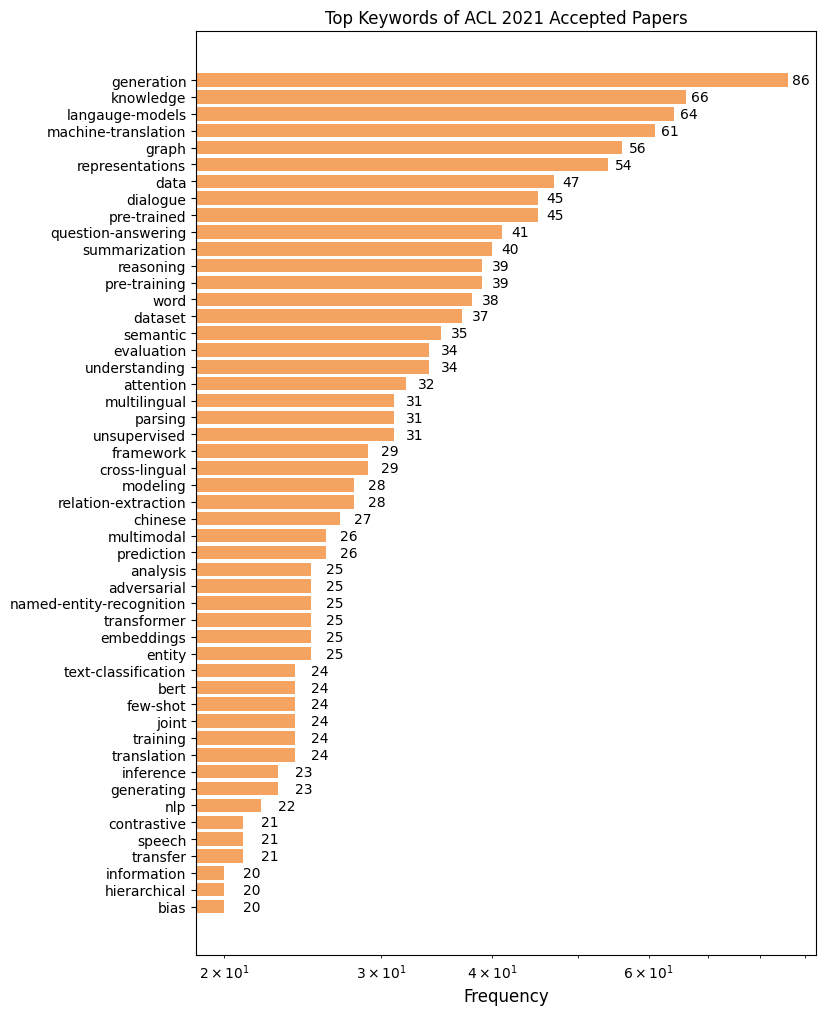

In [24]:
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline


plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8, 12))

top_k = 50
key = [k[0] for k in keywords[:top_k]] 
value = [k[1] for k in keywords[:top_k]] 
y_pos = list(range(len(key)))

ax.barh(y_pos, value, align="center", color=random.sample(mcolors.cnames.items(), 1)[0], ecolor='black', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(key, rotation=0, fontsize=10)
ax.invert_yaxis() 

for i, v in enumerate(value):
    ax.text(v + 1, i + .25, str(v), color='black', fontsize=10)
ax.set_xlabel("Frequency", fontsize=12)
ax.set_title(f"Top Keywords of {CONFERENCE} Accepted Papers", fontsize=12)

plt.savefig("figure/keywords.png", bbox_inches="tight")
plt.show()

# 3. Word Cloud

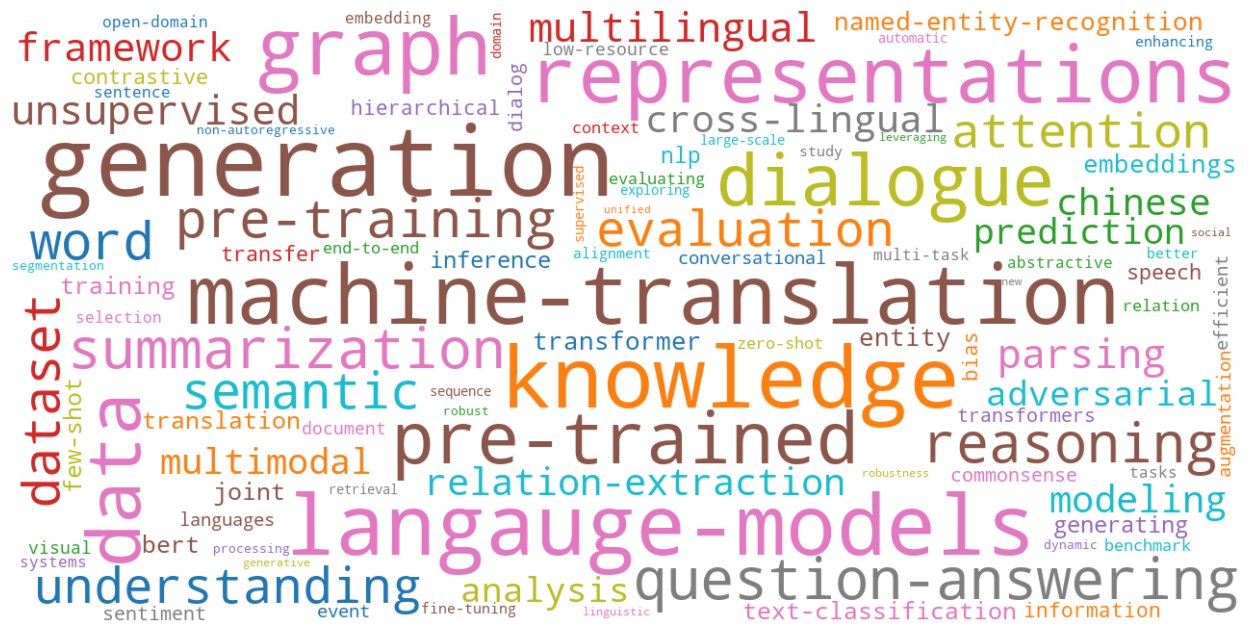

In [25]:
# Show the word cloud forming by keywords
from wordcloud import WordCloud
from matplotlib import cm

cmap = random.sample(list(cm.datad.keys()), 1)[0]
wordcloud = WordCloud(max_font_size=100, 
                      max_words=100, 
                      width=1280, 
                      height=640,
                      colormap="tab10",
                      background_color="white").generate_from_frequencies(dict(keywords))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.savefig("figure/wordcloud.png", bbox_inches="tight")
plt.show()

# 4. Output (README)

In [26]:
def print_papers(papers, track, tag):
    for p in papers:
        if p[2] == track:
            if p[3]:
                f.write(f"- `[{tag}]` **{p[0]}**, *{p[1]}*, <{p[-1]}>\n")
            else:
                f.write(f"- `[{tag}]` **{p[0]}**, *{p[1]}*\n")

In [27]:
tracks = [(len(v), k) for k, v in track_papers.items()]
sorted(tracks, reverse=True)

[(87, 'Machine Translation and Multilinguality'),
 (72, 'Machine Learning for NLP'),
 (64, 'Dialog and Interactive Systems'),
 (63, 'Information Extraction'),
 (46,
  'Semantics: Sentence-level Semantics, Textual Inference and Other areas'),
 (46, 'Resources and Evaluation'),
 (44, 'NLP Applications'),
 (38, 'Question Answering'),
 (34, 'Language Generation'),
 (34, 'Interpretability and Analysis of Models for NLP'),
 (32, 'Sentiment Analysis, Stylistic Analysis, and Argument Mining'),
 (24, 'Information Retrieval and Text Mining'),
 (23, 'Summarization'),
 (22, 'Semantics: Lexical Semantics'),
 (22, 'Computational Social Science and Cultural Analytics'),
 (18, 'Syntax: Tagging, Chunking, and Parsing'),
 (18, 'Language Grounding to Vision, Robotics and Beyond'),
 (13, 'Speech and Multimodality'),
 (12, 'Linguistic Theories, Cognitive Modeling and Psycholinguistics'),
 (11, 'Ethics in NLP'),
 (9, 'Discourse and Pragmatics'),
 (7, 'Theme'),
 (7, 'Phonology, Morphology and Word Segmentati

In [28]:
tracks = [x[1] for x in sorted(tracks, reverse=True)]

In [30]:
with open("README.md", "w") as f:
    f.write(f"# {CONFERENCE} Papers\n\n")
    f.write("![wordcloud](figure/wordcloud.png)\n\n")
    
    f.write("## Keywords\n\n")
    f.write("![keywords](figure/keywords.png)\n\n")
    
    f.write("## Main Conference\n\n")
    f.write(f"There are accepted papers of [{CONFERENCE}]({CONFERENCE_LINK}) with arXiv link.\n")
    f.write("Papers are grouped according to their track.\n")
    f.write("The tags `[L]` and `[S]` (prefix of each paper) represent Main Conference -- Long Paper, Main Conference -- Short Paper, respectively.\n\n")
    
    # ToC
    f.write("**Table of Contents**\n\n")
    for track in tracks:
        track_tag = '-'.join(track.lower().replace(':', '').replace(',', '').split())
        f.write(f"- [{track}](#{track_tag})\n")  
    
    for track in tracks:
        f.write(f"\n### {track}\n\n")
        print_papers(main_long, track, tag="L")
        print_papers(main_short, track, tag="S")
        f.write("\n[Back to Top](#main-conference)\n")
    f.write("\n")
    
    f.write("## Findings of ACL\n\n")
    f.write(f"There are accepted papers to findings of [{CONFERENCE}]({CONFERENCE_LINK}) with arXiv link.\n")
    f.write("The tags `[L]` and `[S]` (prefix of each paper) represent Findings -- Long Paper, Findings -- Short Paper, respectively.\n\n")
    
    for p in findings_long:
        if p[3]:
            f.write(f"- `[L]` **{p[0]}**, *{p[1]}*, <{p[-1]}>\n")
        else:
            f.write(f"- `[L]` **{p[0]}**, *{p[1]}*\n")
    
    for p in findings_short:
        if p[3]:
            f.write(f"- `[S]` **{p[0]}**, *{p[1]}*, <{p[-1]}>\n")
        else:
            f.write(f"- `[S]` **{p[0]}**, *{p[1]}*\n")
    
    f.write("\n[Back to Top](#findings-of-acl)\n")
    f.write("\n")

In [ ]:
with open("data/schedule.txt") as f:
    data = f.read().split("\n\n")
    
i = 0
_tracks = {}
while i < len(data):
    if data[i].startswith("Session "):
        name = ":".join(data[i].split(":")[1:]).strip()
        if name.split(" ")[-1].isnumeric():
            name = " ".join(name.split(" ")[:-1]).strip()
        if name == "NLP Applications 1 and Ethics":
            name = "NLP Applications"
        if name not in _tracks:
            _tracks[name] = []
            
        j = i + 2
        while j < len(data):
            if data[j].startswith("Session ") or data[j].startswith("Poster "):
                break
            if len(data[j]) <= len("00:00-00:00"):
                j += 1
                continue
            _tracks[name].append(data[j].split("\n")[0])
            j += 1
        i = j
    elif data[i].startswith("Poster "):
        name = ":".join(data[i].split(":")[1:]).strip()
        if name.split(" ")[-1].isnumeric():
            name = " ".join(name.split(" ")[:-1]).strip()
        if name == "NLP Applications 1 and Ethics":
            name = "NLP Applications"
        if name not in _tracks:
            _tracks[name] = []
            
        j = i + 1
        while j < len(data):
            if data[j].startswith("Session ") or data[j].startswith("Poster "):
                break
            if len(data[j]) <= len("00:00-00:00"):
                j += 1
                continue
            _tracks[name].append(data[j].split("\n")[0])
            j += 1
        i = j
    else:
        print(data[i])

with open("data/track.json", "w") as f:
    json.dump(_tracks, f, indent=4)
        